In [18]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# df = pd.read_csv('./data./balanced_sbert_data.csv')
df = pd.read_csv('./data./balanced_word2vec_data.csv')

In [20]:
df.head(1)

,vectors,result_Encoded
0,[ 6.71284765e-01 1.57197516e+00 -7.98617783e-...,8


In [21]:
def parse_vector(vec_str):
    vec_str = vec_str.strip('[]').replace(',', ' ')
    return np.array([float(x) for x in vec_str.split() if x], dtype=float)

df['vectors'] = df['vectors'].progress_apply(parse_vector)

100%|██████████| 100440/100440 [00:14<00:00, 6888.40it/s]


In [22]:
X = np.vstack(df['vectors'].values)
Y = df['result_Encoded'].values

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
model = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    learning_rate_init=0.0003,
    alpha=0.0005,                # L2 regularization (avoid overfitting)
    batch_size=64,               # smaller → better generalization
    max_iter=10000,
    early_stopping=False,
    n_iter_no_change=35,
    validation_fraction=0.15,
    beta_1=0.9,
    beta_2=0.999,
    verbose=True
)

In [28]:
model.fit(X_train,Y_train)

Iteration 1, loss = 0.29225018
Iteration 2, loss = 0.15513100
Iteration 3, loss = 0.14321007
Iteration 4, loss = 0.13646436
Iteration 5, loss = 0.13619065
Iteration 6, loss = 0.13230697
Iteration 7, loss = 0.12808798
Iteration 8, loss = 0.12729086
Iteration 9, loss = 0.12581509
Iteration 10, loss = 0.12360174
Iteration 11, loss = 0.12477337
Iteration 12, loss = 0.12267921
Iteration 13, loss = 0.12092703
Iteration 14, loss = 0.12051123
Iteration 15, loss = 0.11947551
Iteration 16, loss = 0.11864098
Iteration 17, loss = 0.12208322
Iteration 18, loss = 0.11659654
Iteration 19, loss = 0.11703180
Iteration 20, loss = 0.11685580
Iteration 21, loss = 0.11839161
Iteration 22, loss = 0.11429295
Iteration 23, loss = 0.11554204
Iteration 24, loss = 0.11576728
Iteration 25, loss = 0.11447661
Iteration 26, loss = 0.11502725
Iteration 27, loss = 0.11262112
Iteration 28, loss = 0.11290301
Iteration 29, loss = 0.11139644
Iteration 30, loss = 0.11354561
Iteration 31, loss = 0.11351931
Iteration 32, los

c:\Users\user\Documents\Personal\chatbot-with-intent-classification\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:792: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(512, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0005
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",64
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.0003
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",10000
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",None


In [ ]:
import pickle   
# with open ("./pickle_files/balanced_sbert_data_classification_model.pkl","wb") as f:
with open ("./pickle_files/balanced_word2vec_data_classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [30]:
preds = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(Y_test,preds, average='weighted')
recall = recall_score(Y_test,preds, average='weighted')
f1 = f1_score(Y_test,preds, average='weighted')
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")

precision : 0.9327164234826514
recall : 0.9318498606133014
f1 : 0.9315170939492547


In [32]:
cm = confusion_matrix(Y_test , preds)

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


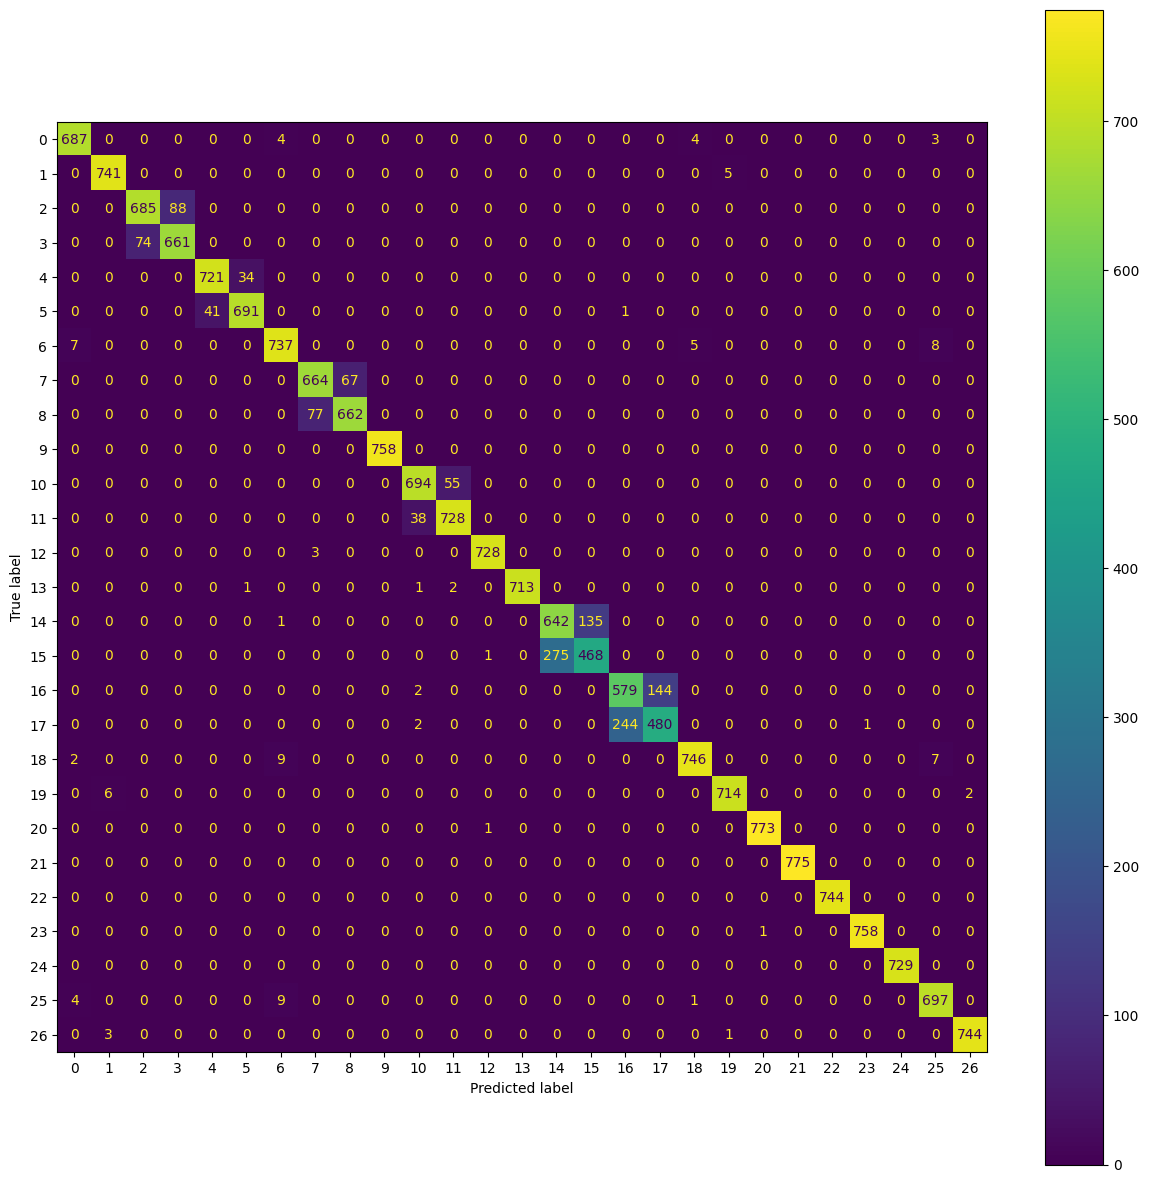

In [40]:
# displaying confusion matrix with custom size
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.show()